# 将Raw Data压缩在Y轴上

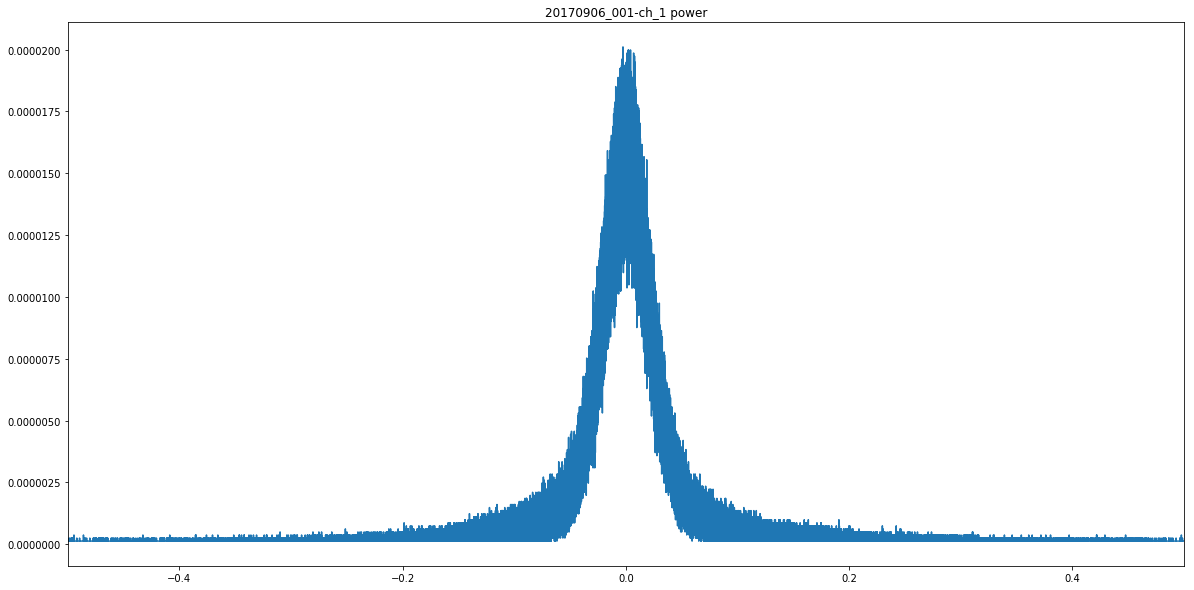

# 将Power后的数据压缩在Y轴上

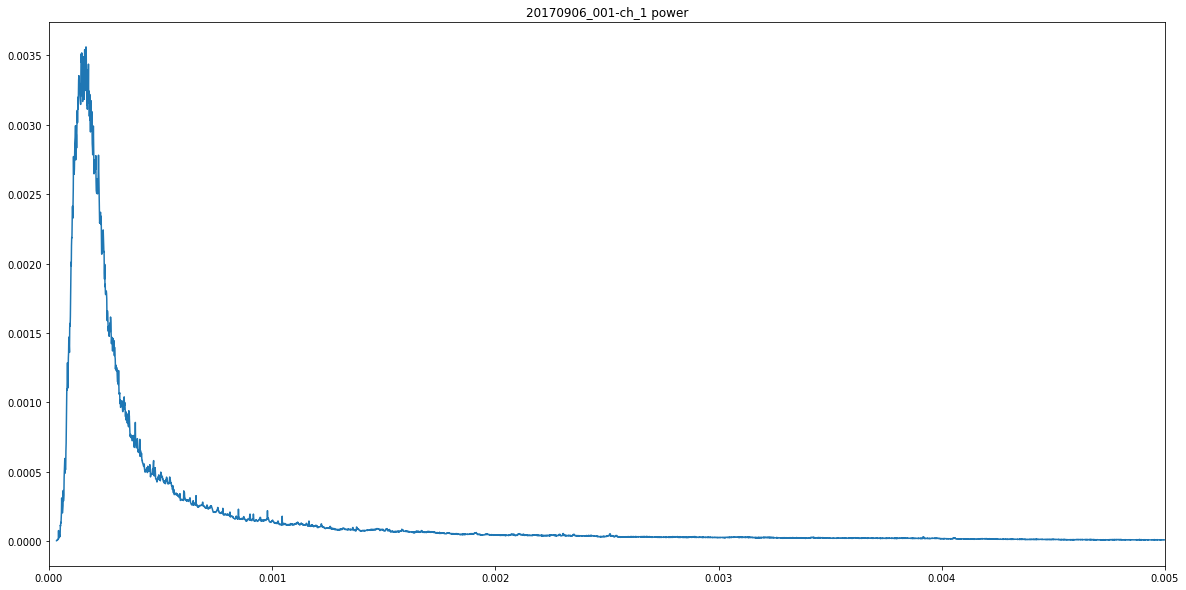

# 取对数$\log_{10}$

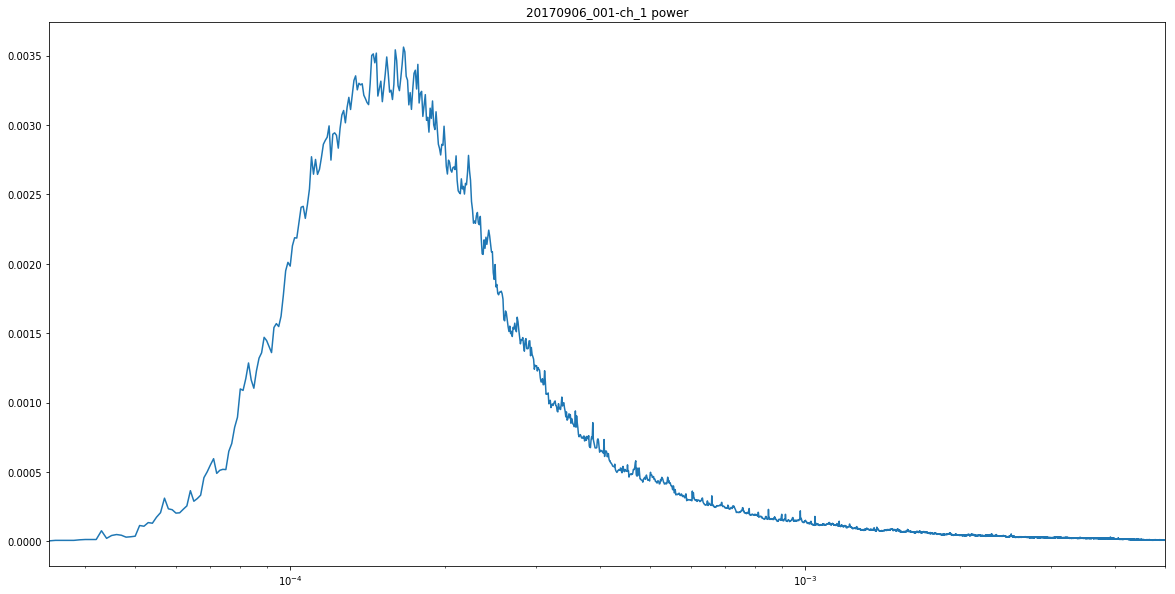

## 通过对比之前基于人工分析得到的参数，来对比新方法的有效性
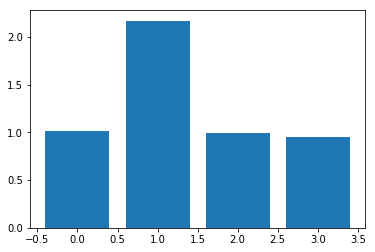
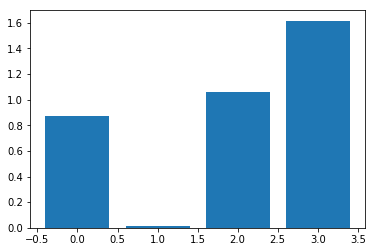

- 20170906_001_4.0_1
![](../chart/20170906_001_4.0_1/R_raw_CH_1_60_600.png)
- 20170906_003_4.0_1
![](../chart/20170906_003_4.0_1/R_raw_CH_1_60_600.png)
- 20170907_001_4.0_1
![](../chart/20170907_001_4.0_1/R_raw_CH_1_60_600.png)
- 20170907_002_4.0_1
![](../chart/20170907_002_4.0_1/R_raw_CH_1_60_600.png)


## 20171007_002_4.0_0
![](./demo6.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import demo_noise_distribution_data_importer as xxx
import scipy.stats as stats
from ipywidgets import *
from ipywidgets import widgets

In [2]:
data_set = xxx.getData()
#data_set: list([sessionName, chName, DataFrame(['time','raw','power'])])

100%|██████████| 4/4 [00:12<00:00,  3.43s/it]


In [80]:
def countWithRange(target, countRange=None, name='power',transformation=np.log10):
    if countRange is None:
        target_data = target[name].values
    else:
        target_data = target[name].values[countRange[0]:countRange[1]]
    #print(target[target.power <0])
    utarget,uind=np.unique(transformation(target_data),return_inverse=True)
    target_count=np.bincount(uind)
    auc = target_count.sum()
    
    return utarget, target_count, auc

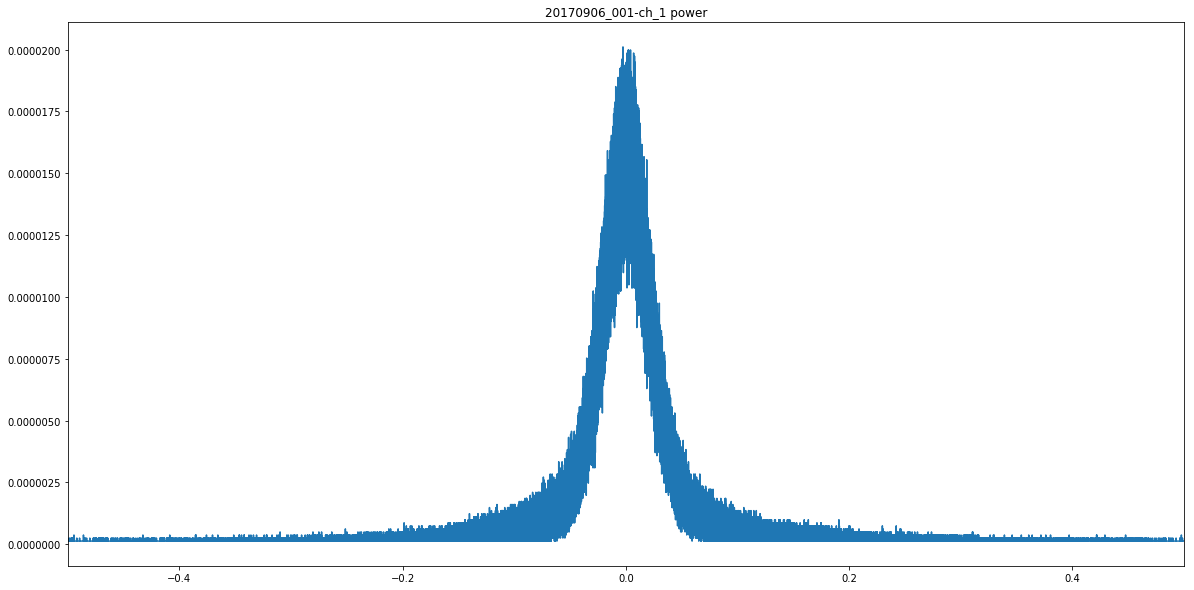

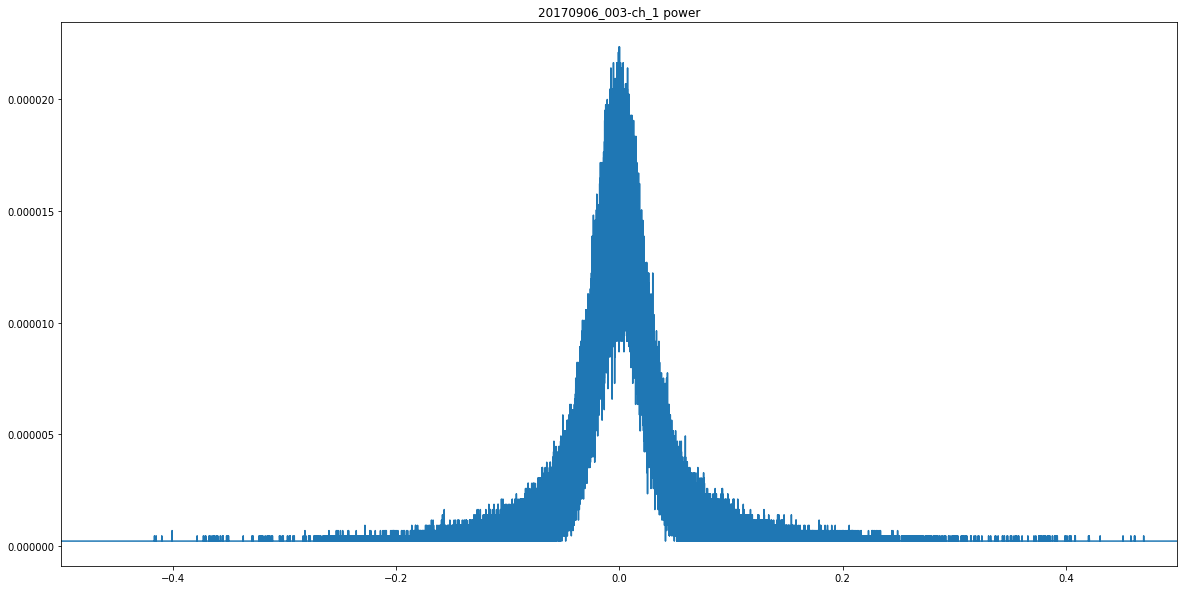

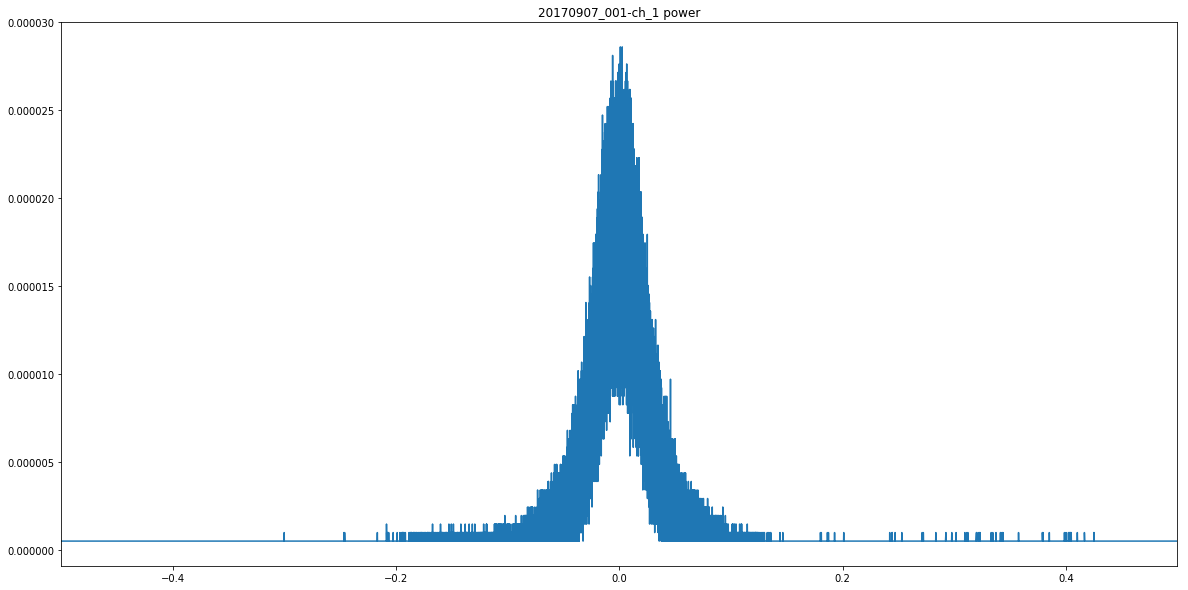

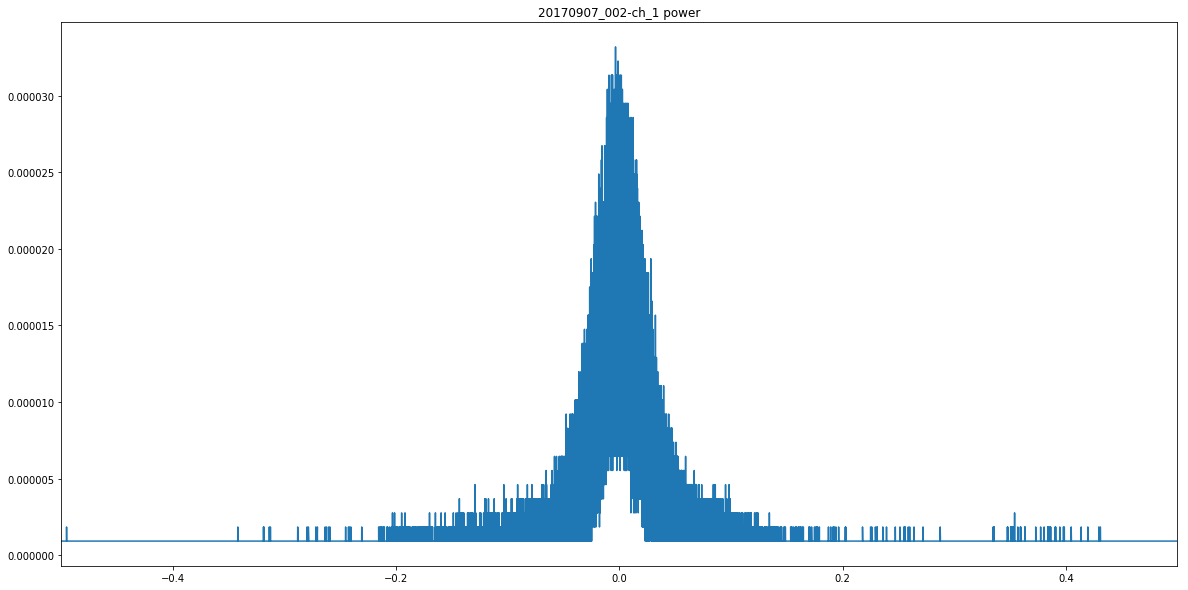

In [4]:
'''plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    plt.legend()
    plt.xlim(-1,1)
plt.show()
plt.close()
'''
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(-0.5,0.5)
    plt.show()
    plt.close()

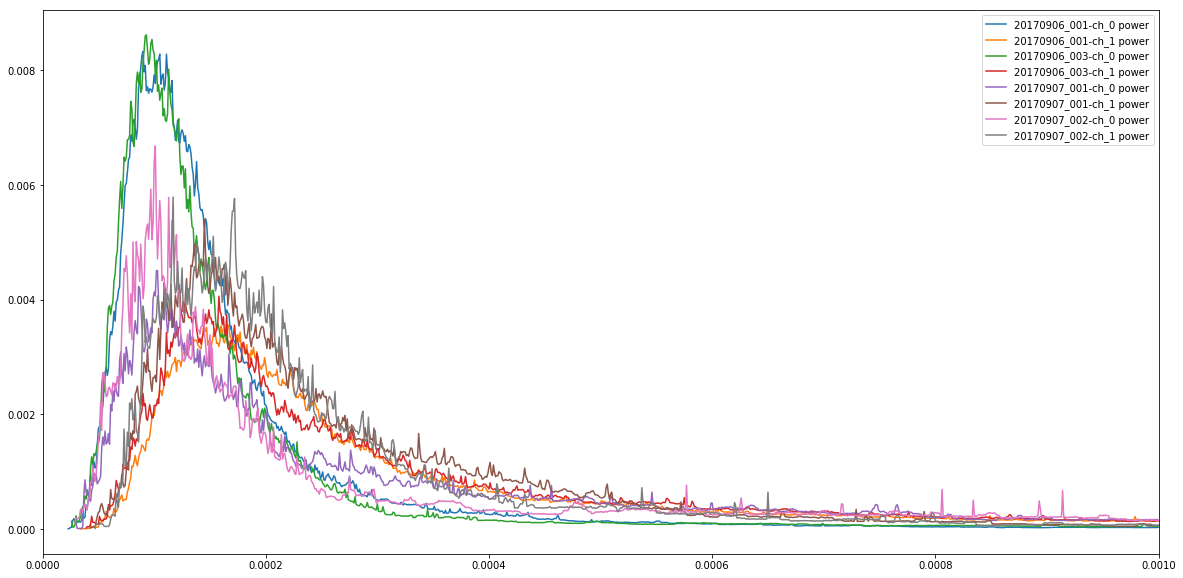

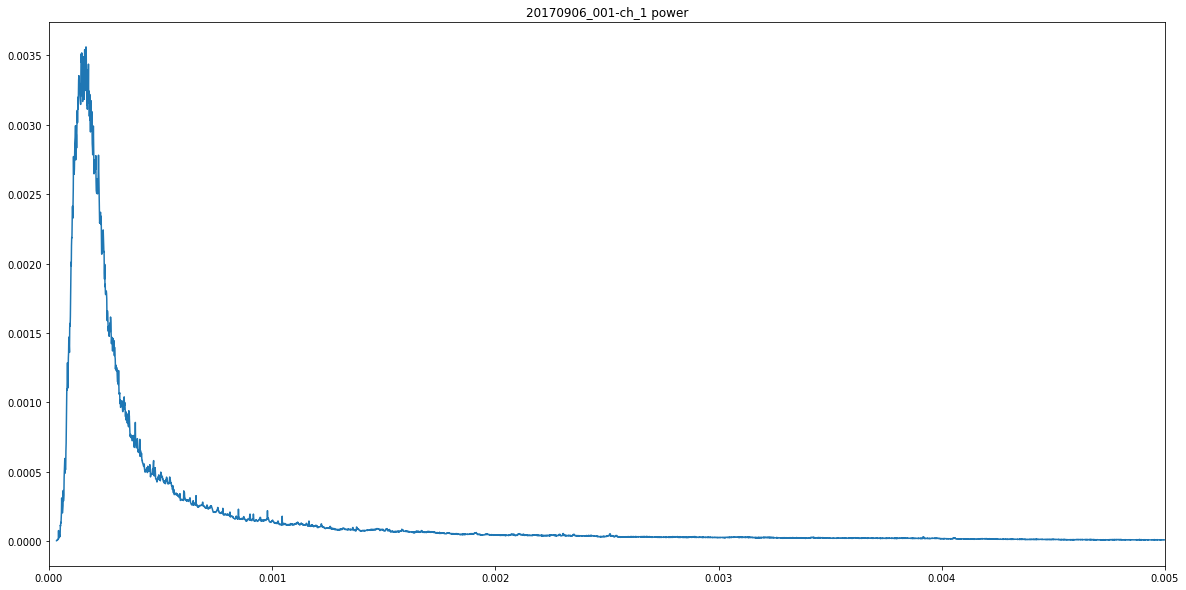

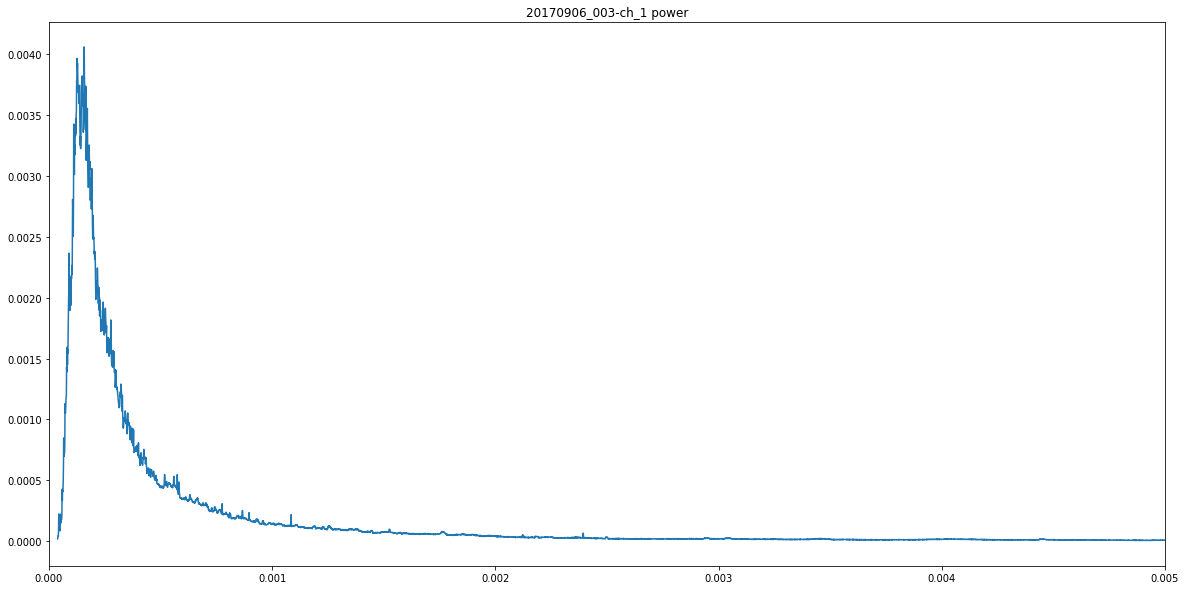

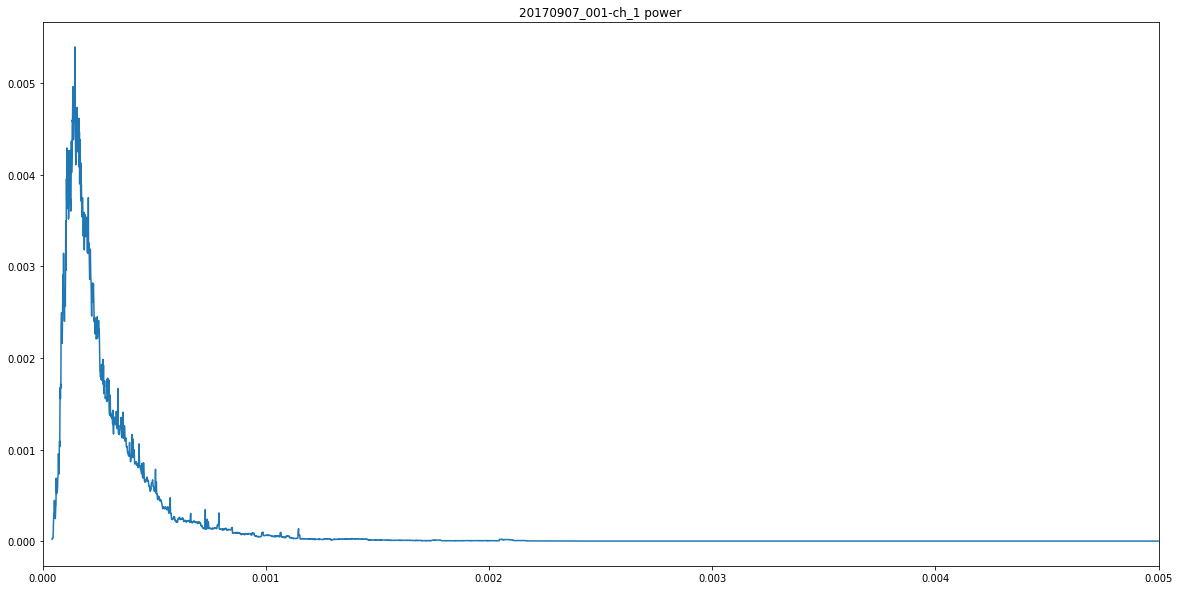

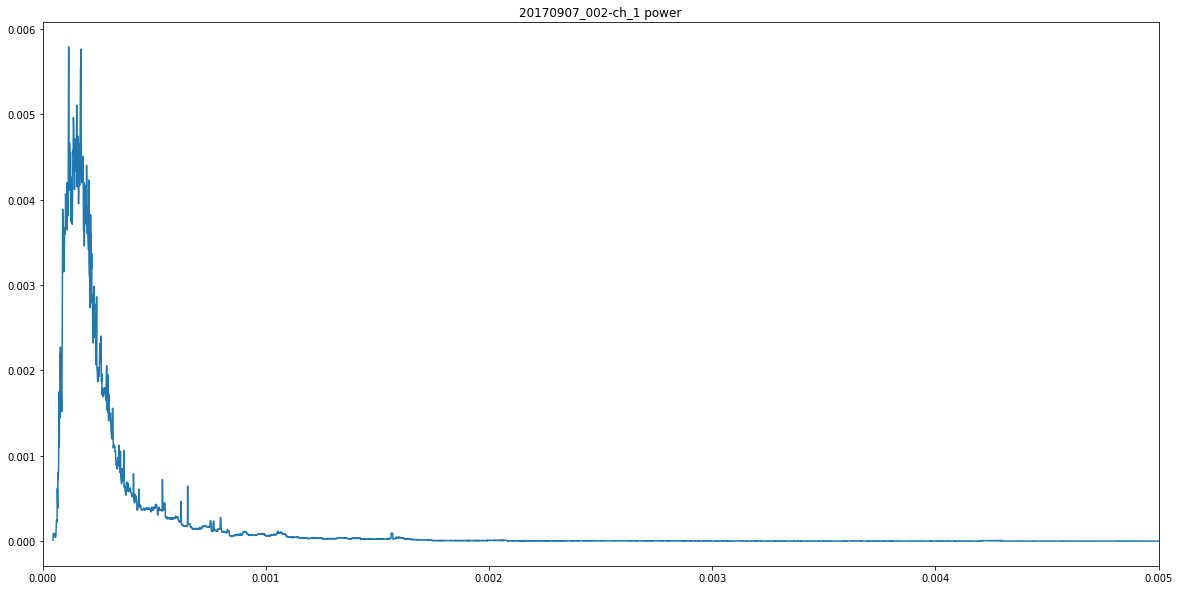

In [5]:
plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    #plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.legend()
    plt.xlim(0,0.001)
plt.show()
plt.close()

for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(0,dataCount[-1]*0.005)
    plt.show()
    plt.close()

(200,) (200,)


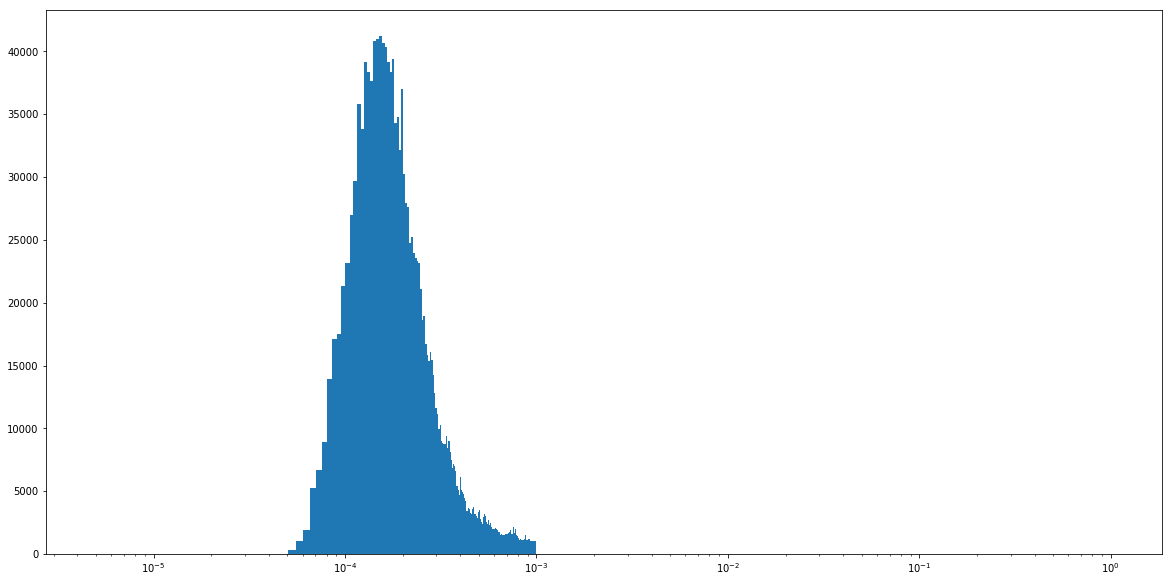

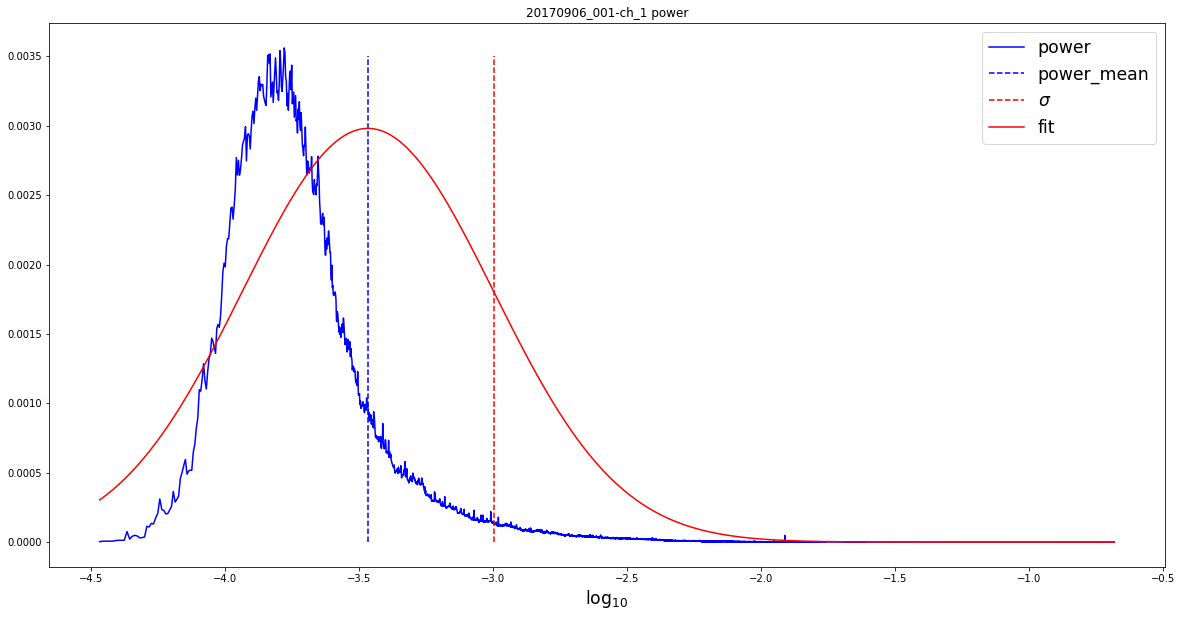

In [125]:
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    power_data = dataSheet[(dataSheet.power<0.008)]['power'].values[:2000000]
    logData = np.log10(power_data)
    #print('logData shape as', logData.shape)
    #stats.lognorm._fitstart(dataCount/auc)
    param = stats.norm.fit(logData)
    man_param = stats.norm.fit(logData, floc=-3.8) #
    #param = stats.lognorm.fit(logData, 1)
    #print(param)
    #param = (0.73882778230976731, 3.8083454031158476e-05, 0.000161582113658737) #shape(sigma), loc, scale(mu)
    #pdf_fitted = stats.lognorm.pdf(uData, param[0], loc=param[1], scale=param[2])
    pdf_fitted = stats.norm.pdf(uData, loc=param[0], scale=param[1])
    pdf_man_fitted = stats.norm.pdf(uData, loc=man_param[0], scale=man_param[1])
    
    #reconstruction
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    ax.hist(power_data,bins=np.linspace(0,0.001,200))
    ax.set_xscale("log")
    
    #lshape,lloc,lscale = stats.lognorm.fit(power_data)
    lshape,lloc,lscale = 1.28575584853, 5.29393914775e-05, 0.000254761086019
    #print(lshape,lloc,lscale)
    x = np.logspace(0, 0.001, 200)
    pdf = stats.lognorm.pdf(x, lshape, lloc, lscale)
    print(x.shape, pdf.shape)
    ax.plot(x, pdf,'r')

    plt.show()
    plt.close()
    

    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc, label='power',c='b')
    
    mu = logData.mean()
    #print(mu)
    plt.plot([mu,mu],[0,0.0035],'b--',label='power_mean')
    
    on_thresh = (param[0]+param[1])
    man_on_thresh = (man_param[0]+man_param[1])
    
    plt.plot([on_thresh, on_thresh],[0,0.0035], 'r--', label='$\sigma$')
    #plt.plot([man_on_thresh, man_on_thresh],[0,0.0035], 'g--', label='$\sigma_2$')
    #plt.plot([param[2],param[2]],[0,0.0035])
    
    plt.plot(uData, pdf_fitted*0.0035, label='fit',c='r')
    #plt.plot(uData, pdf_man_fitted*0.0035, 'g--', label='fit2')
    
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlabel('$\log_{10}$', fontsize='xx-large')
    plt.legend(fontsize='xx-large')
    #plt.xlim(0,uData[-1]*0.01)
    plt.show()
    plt.close()
    break

In [23]:
param

(-3.4075730333064262, 0.52260670849754665)

|Session| threshold | percentage| n|
| :--: | :--: |:--:|:--:|
|0906_001| 0.000449616734267| 0.666| 8|
|0906_003| 0.0248541996329| 0.99| 10|
|0907_001| 0.000217336669261| 0.55| 1| 
|0907_002| 0.000146221708007| 0.27| 3|

20170906_001 : -3.40757303331
20170906_003 : -3.47922649343
20170907_001 : -3.63812415751
20170907_002 : -3.62677197972


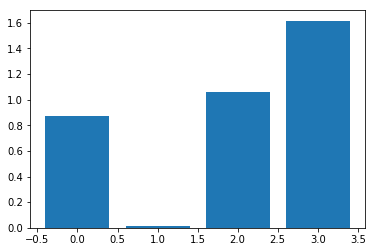

In [7]:
Expected = {'20170906_001':0.000449616734267,
    '20170906_003':0.0248541996329,
    '20170907_001':0.000217336669261,
    '20170907_002':0.000146221708007}
i = 0
result = []
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    logData = np.log10(dataSheet['power'].values)
    param = stats.norm.fit(logData) #
    
    ratio = 10**(param[0])/(Expected[sessionName])
    result.append(ratio)
    print(sessionName,':',param[0])

plt.figure()
plt.bar(range(4), result)
plt.show()
plt.close()

In [8]:
def paramTest(op1, op2):
    Expected = {'20170906_001':0.000449616734267,
    '20170906_003':0.0248541996329,
    '20170907_001':0.000217336669261,
    '20170907_002':0.000146221708007}
    i = 0
    result = []
    for sessionName, chName, dataSheet in data_set:
        if chName == 0:
            continue
        uData, dataCount, auc = countWithRange(dataSheet)
        logData = np.log10(dataSheet['power'].values)
        param = stats.norm.fit(logData) #
        
        ratio = 10**(param[0]*op1)*op2/(Expected[sessionName])
        result.append(ratio)
        #print(sessionName,':',param[0])

    plt.figure()
    plt.bar(range(4), result)
    plt.show()
    plt.close()

In [9]:
_ = interact(paramTest,op1=(0.1,2.),op2=(0.1,2.))

interactive(children=(FloatSlider(value=1.05, description='op1', max=2.0, min=0.1), FloatSlider(value=1.05, description='op2', max=2.0, min=0.1), Output()), _dom_classes=('widget-interact',))

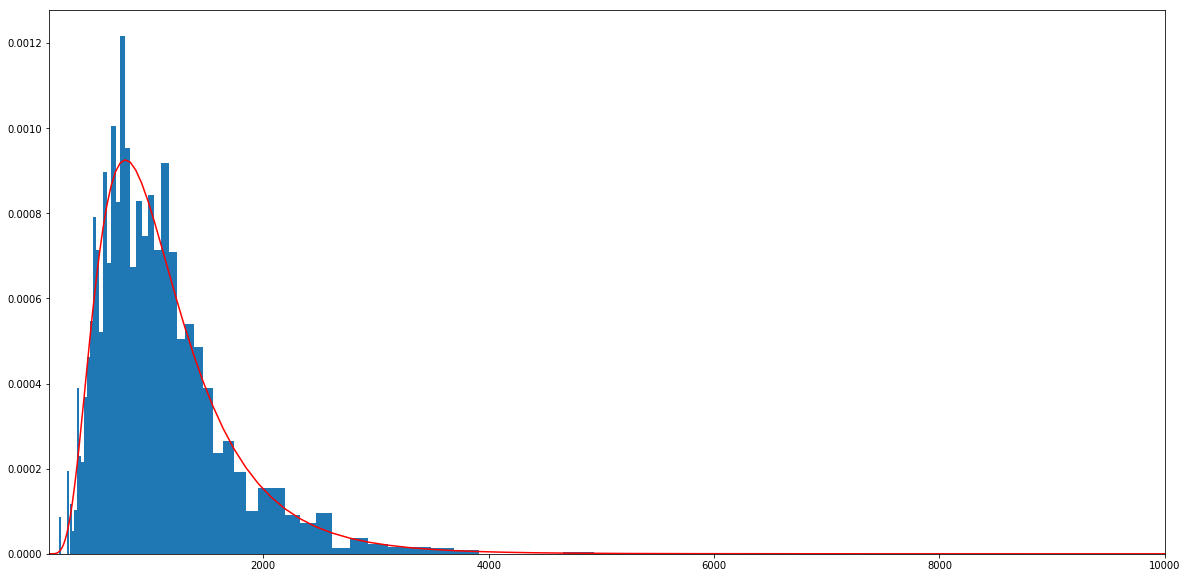

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

np.random.seed(42)

data = lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000)

# plot histogram in log space
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.hist(data, bins=np.logspace(0,5,200),normed=1)
#ax.set_xscale("log")
plt.xlim(100,10000)

shape,loc,scale = lognorm.fit(data)

x = np.logspace(0, 5, 200)
pdf = lognorm.pdf(x, shape, loc, scale)

ax.plot(x, pdf, 'r')

plt.show()